Data pertama yang dibaca:
     id gender age    county  ptb                                      remarks
0  1000   male  31  Shenxhen    0                                       normal
1  1001   male  64  Shenxhen    0                                       normal
2  1002   male  35  Shenxhen    0                                       normal
3  1003   male  32  Shenxhen    1               STB,ATB,tuberculosis pleuritis
4  1004   male   2  Shenxhen    1  secondary PTB  in the bilateral upper field

Data setelah konversi kolom 'age' ke numerik:
    age
0  31.0
1  64.0
2  35.0
3  32.0
4   2.0

Apakah ada nilai NaN setelah konversi?
age    7
ptb    0
dtype: int64

Setelah imputasi, apakah ada nilai NaN?
age    0
ptb    0
dtype: int64


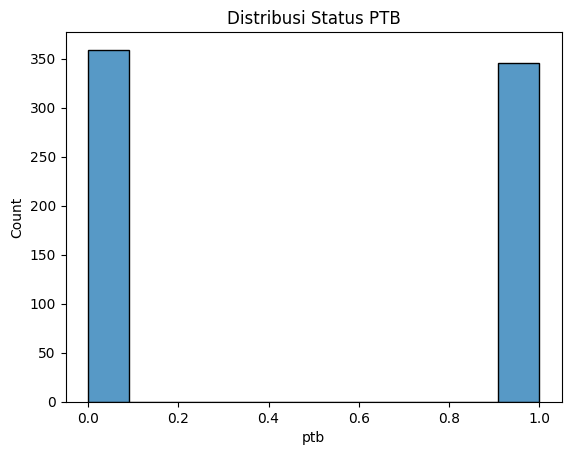

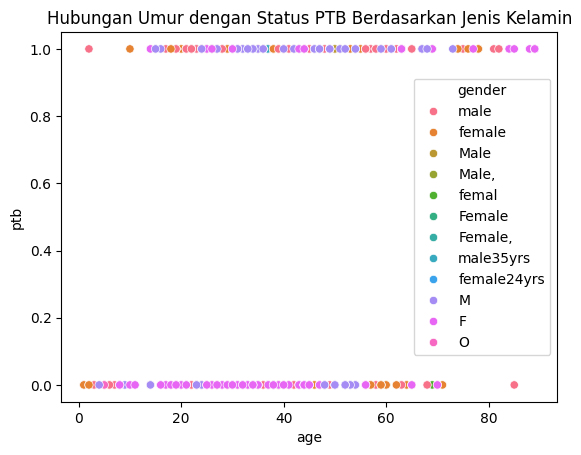

Confusion Matrix:
[[82 33]
 [71 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61       115
           1       0.44      0.27      0.33        97

    accuracy                           0.51       212
   macro avg       0.49      0.49      0.47       212
weighted avg       0.49      0.51      0.48       212


Accuracy Score:
0.5094339622641509


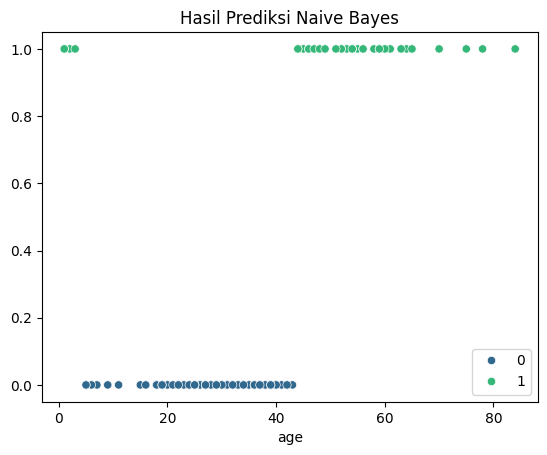

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Membaca data dengan benar
columns = ["id", "gender", "age", "county", "ptb", "remarks"]
df = pd.read_csv('tbc.csv', names=columns, header=0, sep=';')  # jika pemisahnya titik koma



# Tampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print("Data pertama yang dibaca:")
print(df.head())

# Konversi kolom numerik dan tangani nilai NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Cek data setelah konversi
print("\nData setelah konversi kolom 'age' ke numerik:")
print(df[['age']].head())

# Cek apakah ada nilai NaN setelah konversi
print("\nApakah ada nilai NaN setelah konversi?")
print(df[['age', 'ptb']].isnull().sum())

# Imputasi nilai NaN dengan mean (jika ada nilai yang hilang di kolom umur)
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

# Cek kembali apakah masih ada nilai NaN setelah imputasi
print("\nSetelah imputasi, apakah ada nilai NaN?")
print(df[['age', 'ptb']].isnull().sum())

# Visualisasi distribusi status PTB
sns.histplot(df['ptb'], kde=False)
plt.title("Distribusi Status PTB")
plt.show()

# Visualisasi hubungan antara umur dan status PTB
sns.scatterplot(data=df, x="age", y="ptb", hue="gender")
plt.title("Hubungan Umur dengan Status PTB Berdasarkan Jenis Kelamin")
plt.show()

# Persiapan data untuk Naive Bayes
X = df[["age"]]  # Menggunakan umur (age) sebagai fitur
y = df["ptb"]    # Status PTB sebagai target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualisasi prediksi
sns.scatterplot(x=X_test["age"], y=y_pred, hue=y_pred, palette="viridis")
plt.title("Hasil Prediksi Naive Bayes")
plt.show()
